## Decision Tree

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc

from time import time
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify = cancer.target, random_state = 0)
dtree = DecisionTreeClassifier(random_state = 0)  
# what's this random state for?
dtree.fit(X_train, y_train)
#print(dtree.get_params)
print("Decision tree score - training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Decision tree score - test set: {:.3f}".format(dtree.score(X_test, y_test)))

y_pred = dtree.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Decision tree AUC score - training set: {:.3f}".format(roc_auc))

y_pred = dtree.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Decision tree AUC score - test set: {:.3f}".format(roc_auc))

dtree_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)  
dtree_entropy.fit(X_train, y_train)
print("Decision tree using entropy score - training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Decision tree using entropy score - test set: {:.3f}".format(dtree.score(X_test, y_test)))
#------------------------------------------------------------------------------------------
print("-------------------------------")

dtree_final = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf =2, random_state = 0)  
start = time() #before fitting
dtree_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("Decision tree score - training (entropy, max dep4, min leaf 2) : {:.3f}".format(dtree_final.score(X_train, y_train)))
print("Decision tree score - test (entropy, max dep4, min leaf 2) : {:.3f}".format(dtree_final.score(X_test, y_test)))

y_pred = dtree_final.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Decision tree final AUC score - training set: {:.3f}".format(roc_auc))

y_pred = dtree_final.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Decision tree final AUC score - test set: {:.3f}".format(roc_auc))

Decision tree score - training set: 1.000
Decision tree score - test set: 0.902
Decision tree AUC score - training set: 1.000
Decision tree AUC score - test set: 0.903
Decision tree using entropy score - training set: 1.000
Decision tree using entropy score - test set: 0.902
-------------------------------
time took: 0.010 seconds 
Decision tree score - training (entropy, max dep4, min leaf 2) : 0.979
Decision tree score - test (entropy, max dep4, min leaf 2) : 0.923
Decision tree final AUC score - training set: 0.977
Decision tree final AUC score - test set: 0.927


### Learning Curve

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

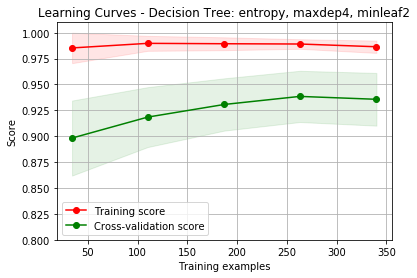

In [54]:
#learning curve
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves - Decision Tree: entropy, maxdep4, minleaf2"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = dtree_final
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

In [ ]:
title = "Learning Curves - Decision Tree: entropy, maxdep4, minleaf2"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = dtree_final
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

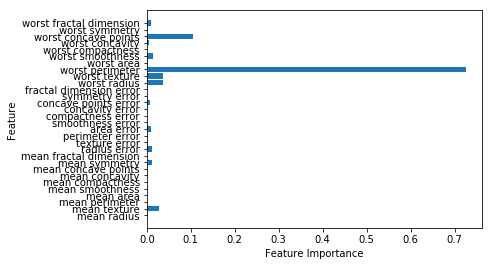

In [52]:
def plot_feature_importance_cancer (model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
   
plot_feature_importance_cancer(dtree)

In [32]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [61]:
dtree.feature_importances_

array([0.        , 0.02831198, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01101841, 0.        ,
       0.01223453, 0.        , 0.        , 0.00999282, 0.        ,
       0.        , 0.        , 0.00668975, 0.        , 0.        ,
       0.03687207, 0.03710758, 0.72534081, 0.        , 0.01433518,
       0.        , 0.00401385, 0.10516335, 0.        , 0.00891967])

In [63]:
print(dtree.max_depth)

None


post pruning

In [69]:
prun_tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
prun_tree.fit(X_train, y_train)
print("Decision Tree Post Bruning max-depth 4 - training score: {:.3f}".format(prun_tree.score(X_train, y_train)))
print("Decision Tree Post Pruning max-depth 4 - test score: {:.3f}".format(prun_tree.score(X_test, y_test)))

Decision Tree Post Pruning max-depth 4 - training score: 0.986
Decision Tree Post Pruning max-depth 4 - test score: 0.909


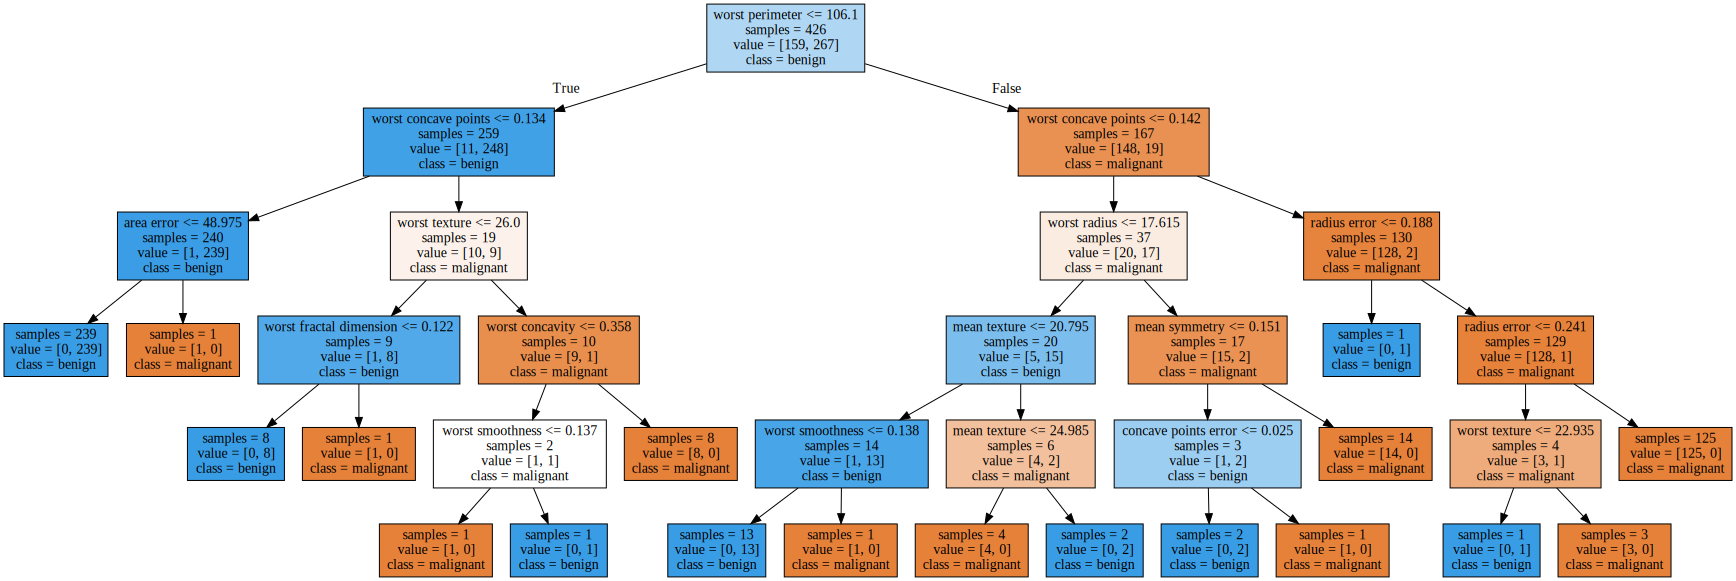

"import pydot\n(graph,) = pydot.graph_from_dot_file('tree.dot')\ngraph.write_png('tree.png')"

In [26]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read() 
  
display(graphviz.Source(dot_graph))

"""import pydot
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')"""

Decision Tree Post Bruning max-depth 4 - training score: 0.986
Decision Tree Post Pruning max-depth 4 - test score: 0.909


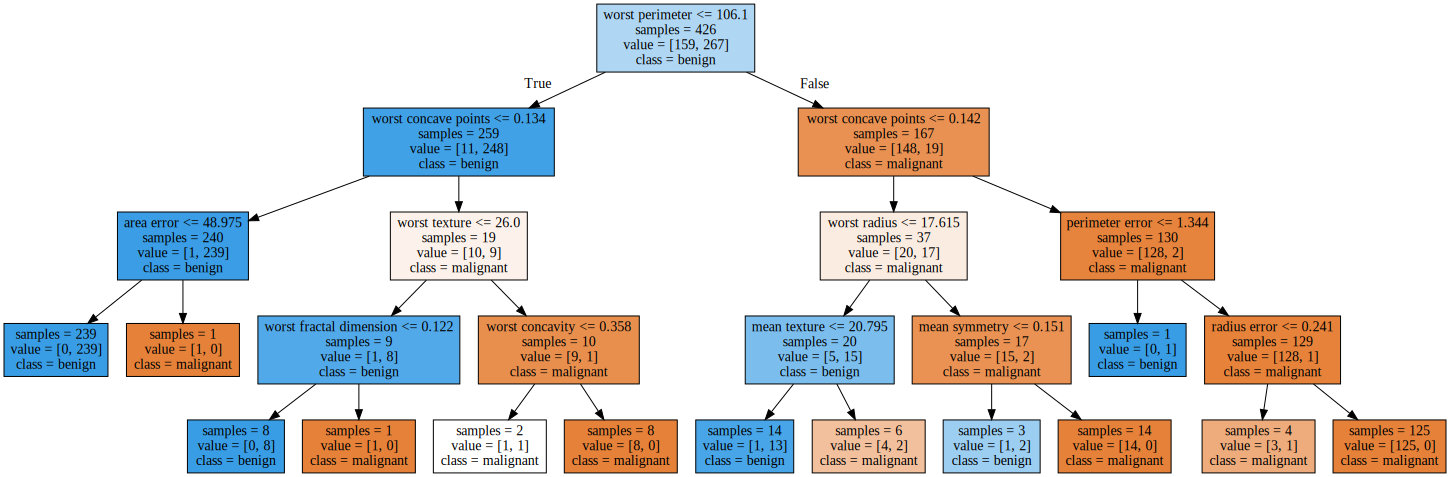

In [167]:
prun_tree4 = DecisionTreeClassifier(max_depth = 4, random_state=0)
prun_tree4.fit(X_train, y_train)
print("Decision Tree Post Bruning max-depth 4 - training score: {:.3f}".format(prun_tree4.score(X_train, y_train)))
print("Decision Tree Post Pruning max-depth 4 - test score: {:.3f}".format(prun_tree4.score(X_test, y_test)))
export_graphviz(prun_tree, out_file="p_tree4.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
with open("p_tree4.dot") as f:
    dot_graph = f.read() 
  
display(graphviz.Source(dot_graph))

import pydot
(graph,) = pydot.graph_from_dot_file('p_tree4.dot')
graph.write_png('p_tree4.png')

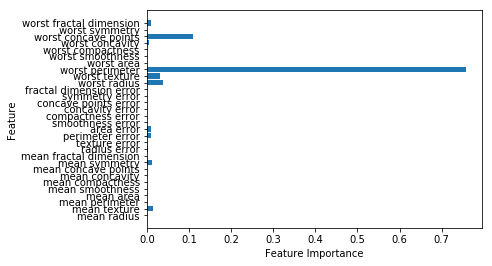

In [104]:
plot_feature_importance_cancer(prun_tree) # doesn't seem to change much

Decision Tree Post Bruning max-depth 3 - training score: 0.977
Decision Tree Post Pruning max-depth 3 - test score: 0.916


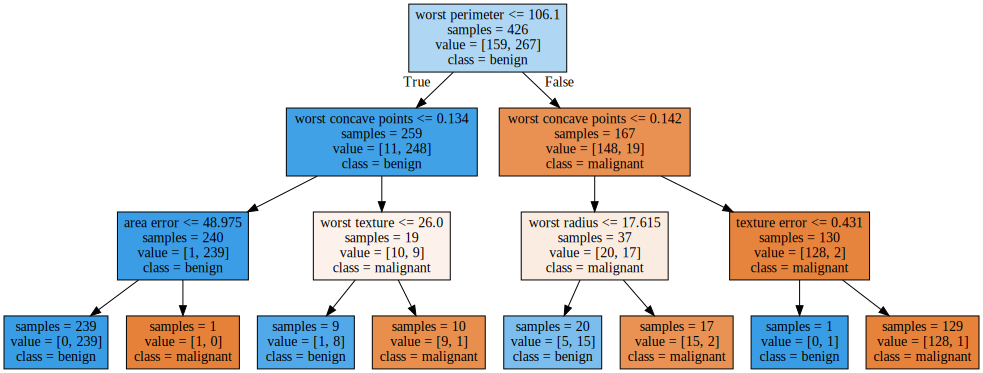

In [117]:
prun_tree3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
prun_tree3.fit(X_train, y_train)
print("Decision Tree Post Bruning max-depth 3 - training score: {:.3f}".format(prun_tree3.score(X_train, y_train)))
print("Decision Tree Post Pruning max-depth 3 - test score: {:.3f}".format(prun_tree3.score(X_test, y_test)))
export_graphviz(prun_tree3, out_file="p_tree3.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
with open("p_tree3.dot") as f:
    dot_graph = f.read() 
  
display(graphviz.Source(dot_graph))

(graph,) = pydot.graph_from_dot_file('p_tree3.dot')
graph.write_png('p_tree3.png')

Decision Tree Post Bruning max-depth 2 - training score: 0.932
Decision Tree Post Pruning max-depth 2 - test score: 0.888


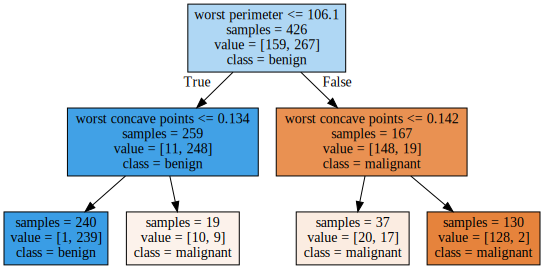

In [113]:
prun_tree2 = DecisionTreeClassifier(max_depth = 2, random_state=0)
prun_tree2.fit(X_train, y_train)
print("Decision Tree Post Bruning max-depth 2 - training score: {:.3f}".format(prun_tree2.score(X_train, y_train)))
print("Decision Tree Post Pruning max-depth 2 - test score: {:.3f}".format(prun_tree2.score(X_test, y_test)))
export_graphviz(prun_tree2, out_file="p_tree2.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
with open("p_tree2.dot") as f:
    dot_graph = f.read() 
  
display(graphviz.Source(dot_graph))

(graph,) = pydot.graph_from_dot_file('p_tree2.dot')
graph.write_png('p_tree2.png')

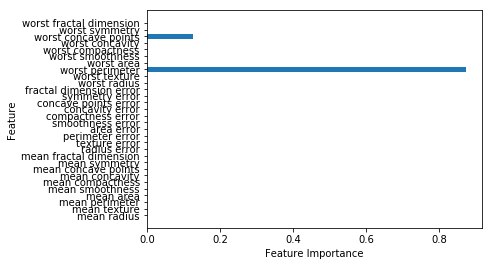

In [116]:
plot_feature_importance_cancer(prun_tree2)

In [ ]:
ValidationCurve(DecisionTreeClassifier(), param_name = 'max_depth', 
                      param_range = np.arange(1,11), cv = 10, scoring="r2")


### Grid Searh

In [25]:
#grid search v. randomize search
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i)) 
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   

#---------------------------------------------------------------------------------------------
"""<bound method BaseEstimator.get_params of DecisionTreeClassifier(
            class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>"""

param_grid = {'criterion': ['gini','entropy'],
              'max_depth': np.arange(2,5 ), #(2,10)
              'min_samples_leaf':np.arange(1, 3)}
            
grid_search = GridSearchCV(dtree, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings." %((time() - start), len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

***GridSearchCV took 0.29 seconds for 12 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.948 (std: 0.019)
Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}

Model with rank: 1
Mean validation score: 0.948 (std: 0.019)
Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}

Model with rank: 3
Mean validation score: 0.944 (std: 0.023)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.944 (std: 0.023)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}

Model with rank: 5
Mean validation score: 0.934 (std: 0.020)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}



In [27]:
param_grid = {'criterion': ['entropy'],
              'max_depth': np.arange(2,5 ), #(2,10)
              'min_samples_leaf':np.arange(1, 3)}
            
grid_search = GridSearchCV(dtree, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings." %((time() - start), len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

***GridSearchCV took 0.23 seconds for 6 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.948 (std: 0.019)
Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}

Model with rank: 1
Mean validation score: 0.948 (std: 0.019)
Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}

Model with rank: 3
Mean validation score: 0.944 (std: 0.023)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.944 (std: 0.023)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}

Model with rank: 5
Mean validation score: 0.908 (std: 0.014)
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}

Model with rank: 5
Mean validation score: 0.908 (std: 0.014)
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2}



In [29]:
param_grid = {'criterion': ['gini'],
              'max_depth': np.arange(2,5 ), #(2,10)
              'min_samples_leaf':np.arange(1, 3)}
            
grid_search = GridSearchCV(dtree, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings." %((time() - start), len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

***GridSearchCV took 0.14 seconds for 6 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.934 (std: 0.020)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}

Model with rank: 2
Mean validation score: 0.927 (std: 0.030)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2}

Model with rank: 2
Mean validation score: 0.927 (std: 0.024)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

Model with rank: 4
Mean validation score: 0.925 (std: 0.022)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}

Model with rank: 4
Mean validation score: 0.925 (std: 0.022)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}

Model with rank: 4
Mean validation score: 0.925 (std: 0.032)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}



In [122]:
from sklearn.metrics import roc_curve, auc #area under curve
y_pred = dtree.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9028301886792454


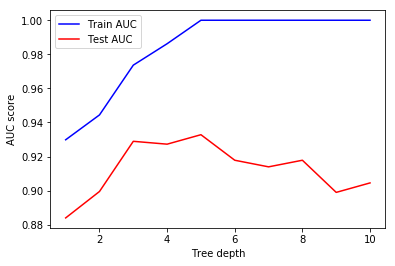

[0.8839622641509435, 0.899475890985325, 0.9289308176100629, 0.9272536687631027, 0.9328092243186583, 0.9178197064989517, 0.9139412997903564, 0.9178197064989517, 0.8989517819706498, 0.9045073375262055]


In [146]:
max_depths = np.linspace(1,10,10,endpoint = True)
train_results = []
test_results = []
for md in max_depths:
    dt = DecisionTreeClassifier (max_depth = md)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label = "Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label = "Test AUC")

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

print(test_results)

#test_results_f = map(lambda n: "%.3f" %n, test_results)
#print(test_results_f)
#l2 = map(lambda n: "%.2f" % n, l)
#for i in test_results:
 #   form = '{:.3f}'.format(i)
 #   print(form)

#print(['{:.2f}'.format(item) for item in theList])
# print("AUC - test: {:.3f}".format(test_results) for item in test_results) -- <generator object <genexpr> at 0x015D8AB0>?


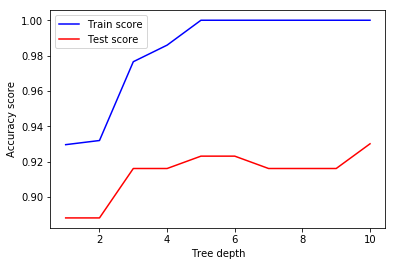

[0.8881118881118881, 0.8881118881118881, 0.916083916083916, 0.916083916083916, 0.9230769230769231, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9300699300699301]
[0.9295774647887324, 0.931924882629108, 0.9765258215962441, 0.9859154929577465, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.888
0.888
0.916
0.916
0.923
0.923
0.916
0.916
0.916
0.930
-------
0.930
0.932
0.977
0.986
1.000
1.000
1.000
1.000
1.000
1.000


In [13]:
max_depths = np.linspace(1,10,10,endpoint = True)

train_scores = []
test_scores = []
for md in max_depths:
    dt = DecisionTreeClassifier (max_depth = md)
    dt.fit(X_train, y_train)
    train_score = dt.score(X_train, y_train)
    train_scores.append(train_score)
    test_score = dt.score(X_test, y_test)
    test_scores.append(test_score)
#from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_scores, 'b', label = "Train score")
line2, = plt.plot(max_depths, test_scores, 'r', label = "Test score")
plt.legend()
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()
print(test_scores)
print(train_scores)

#for i in test_scores:
 #  form = '{:.3f}'.format(i)
  # print(form)
for score in test_scores:
    print("{:.3f}".format(score))
    
print ("-------") 
for score in train_scores:
    print("{:.3f}".format(score))

In [166]:
#dtree = DecisionTreeClassifier(random_state = 0)  
scores = cross_val_score(dtree, cancer.data, cancer.target, cv = 5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.3f}".format(scores.mean()))

Cross-validation scores: [0.90434783 0.92173913 0.91150442 0.94690265 0.90265487]
Average cross-validation score: 0.917


In [165]:
scores3= cross_val_score(prun_tree3, cancer.data, cancer.target, cv = 5)
print("Cross-validation scores (max depth 3): {}".format(scores3))
print("Average cross-validation score (max depth 3): {:.3f}".format(scores3.mean()))

Cross-validation scores (max depth 3): [0.91304348 0.89565217 0.9380531  0.94690265 0.89380531]
Average cross-validation score (max depth 3): 0.917


In [168]:
scores4= cross_val_score(prun_tree4, cancer.data, cancer.target, cv = 5)
print("Cross-validation scores (max depth 4): {}".format(scores4))
print("Average cross-validation score (max depth 4): {:.3f}".format(scores4.mean()))

Cross-validation scores (max depth 4): [0.92173913 0.88695652 0.9380531  0.92920354 0.90265487]
Average cross-validation score (max depth 4): 0.916


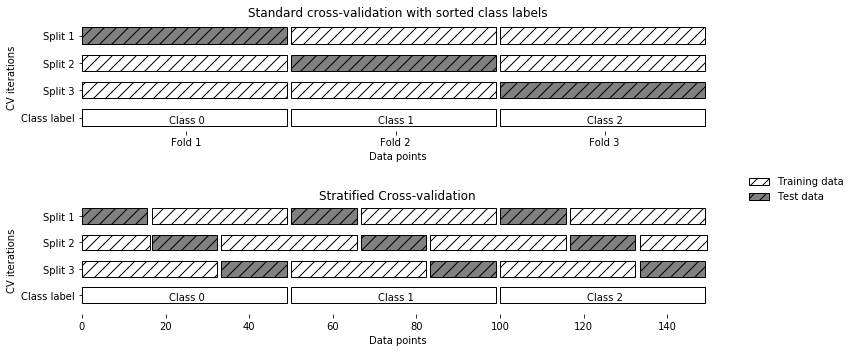

In [174]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()

In [181]:
#from sklearn.model_selection import ShuffleSplit --- ShuffleSplit, stratifiedShuffleSplit
shuffle_split = ShuffleSplit (test_size =0.25, train_size =0.5, n_splits = 10)
scores = cross_val_score(dtree, cancer.data, cancer.target,cv = shuffle_split )
print("cross-validation scores: \n{}".format(scores))
print("cross-validation scores (mean): \n{}".format(scores.mean()))
print("cross-validation scores (min): \n{}".format(scores.min()))
print("cross-validation scores (max): \n{}".format(scores.max()))


cross-validation scores: 
[0.90909091 0.95104895 0.91608392 0.90909091 0.92307692 0.94405594
 0.92307692 0.91608392 0.93706294 0.93706294]
cross-validation scores (mean): 
0.9265734265734265
cross-validation scores (min): 
0.9090909090909091
cross-validation scores (max): 
0.951048951048951


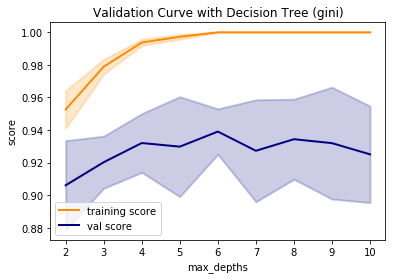

In [34]:
max_depths = range(2,11)
#criterion = 'entropy'
training_score, val_score = validation_curve(DecisionTreeClassifier(), 
                                             X_train, y_train,
                                             param_name = "max_depth", 
                                             param_range = max_depths, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with Decision Tree (gini)") 
plt.xlabel("max_depths")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_depths, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_depths, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_depths, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_depths, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    

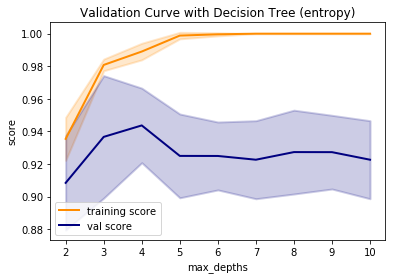

In [33]:
training_score, val_score = validation_curve(DecisionTreeClassifier(criterion = 'entropy'), 
                                             X_train, y_train,
                                             param_name = "max_depth", 
                                             param_range = max_depths, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with Decision Tree (entropy)") 
plt.xlabel("max_depths")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_depths, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_depths, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_depths, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_depths, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    

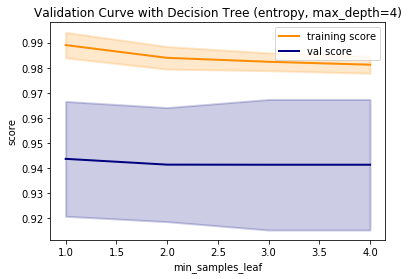

[0.94371081 0.94140666 0.94136889 0.94136889]


In [41]:
min_samples_leaf = range(1,5) 
training_score, val_score = validation_curve(DecisionTreeClassifier(criterion = 'entropy',  max_depth=4), 
                                             X_train, y_train,
                                             param_name = "min_samples_leaf", 
                                             param_range = min_samples_leaf, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with Decision Tree (entropy, max_depth=4)") 
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(min_samples_leaf, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(min_samples_leaf, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(min_samples_leaf, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(min_samples_leaf, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(val_score_mean)

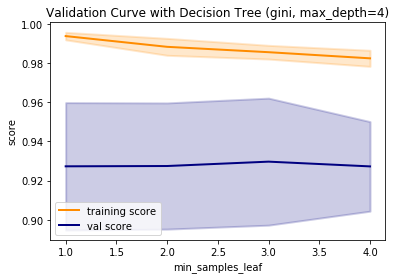

[0.92731737 0.92746972 0.92969706 0.92727708]


In [42]:
min_samples_leaf = range(1,5) 
training_score, val_score = validation_curve(DecisionTreeClassifier(criterion = 'gini',  max_depth=4), 
                                             X_train, y_train,
                                             param_name = "min_samples_leaf", 
                                             param_range = min_samples_leaf, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with Decision Tree (gini, max_depth=4)") 
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(min_samples_leaf, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(min_samples_leaf, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(min_samples_leaf, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(min_samples_leaf, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(val_score_mean)

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

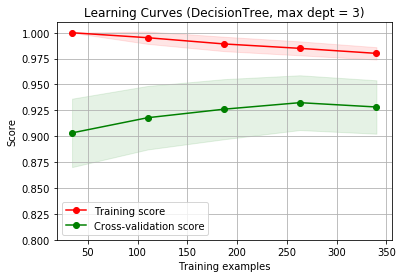

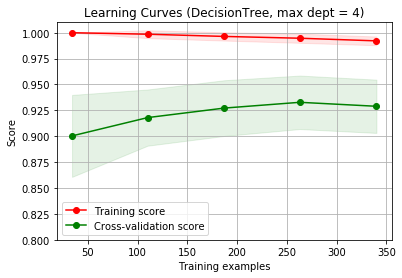

In [9]:
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt
X, y = X_train, y_train

title = "Learning Curves (DecisionTree, max dept = 3)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = DecisionTreeClassifier(max_depth = 3)
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (DecisionTree, max dept = 4)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = DecisionTreeClassifier(max_depth = 4)
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)